# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **

As we are required to predict students with binary outcome labels: fail the final exam or pass the final exam,I think this is the classification problem. The outcome pass or fail corresponds to the action 'need early intervention' or 'no need early intervention'. It is qualitative predication on the input data so that we can use classification method to learn the problem and produce the adequate prediction.  

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")

print "Student data read successfully!"
print "\nTotal observations:%s; with %s columns!"%student_data.shape
print "\nNumberical features description\n",student_data.describe()
print "\n First 5 rows data\n",student_data.head()


Student data read successfully!

Total observations:395; with 31 columns!

Numberical features description
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
m

### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [3]:
# TODO: Calculate number of students
n_students = len(student_data[0:])

# TODO: Calculate number of features
n_features =len(student_data.columns)-1

# TODO: Calculate passing students
n_passed =len(student_data[student_data['passed']=='yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed']=='no'])

# TODO: Calculate graduation rate
grad_rate = 100*(n_passed/float(n_students))

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


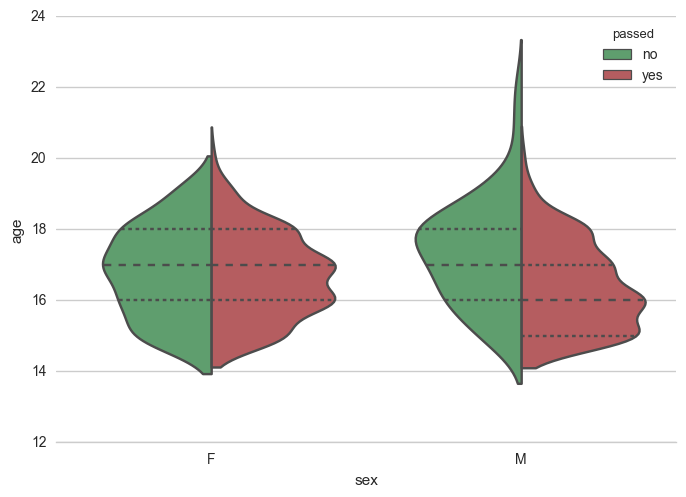

In [4]:
### Additional Explortary Data Analysis per the mentor feedback.
# Look at the distribution of ages for students, with separate plots for each 'sex' and passing vs failing students  
# with different shading

import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid',color_codes=True)

# Draw a nested violinplot and split the viorlins for easier comparison
sns.violinplot(x='sex',y='age',hue='passed',data=student_data,split=True,inner='quart',palette={'yes':'r','no':'g'})
sns.despine(left=True)

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [5]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [6]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}\n".format(len(X_all.columns), list(X_all.columns))




Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']



### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [7]:
# TODO: Import any additional functionality you may need here
from sklearn import cross_validation
# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X_all,y_all,stratify=y_all,test_size=num_test,random_state=8)


# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
print "Grad rate of train set: {:.2f}%".format(100 * (y_train == 'yes').mean())
print "Grad rate of test set: {:.2f}%".format(100 * (y_test == 'yes').mean())

Training set has 300 samples.
Testing set has 95 samples.
Grad rate of train set: 67.00%
Grad rate of test set: 67.37%


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **

As our problem is to classify the students with "PASS" or "FAIL" binary labels, most supervised learning methods for classification would work. Gaussian Naive Bayes(GaussianNB), Ensemble Methods(Random Forest) and Support Vector Machines are the appropriate models for the problem. For each model, I will answer the questions required above one by one as below.

Model I---Gaussian Naive Bayes(GaussianNB)
  Real-World Applicaitons: Naive Bayes Classifiers are very populate in text classification.They have a higher success rate as compared to other algorithms. As a result, it is widely used for Spam Filtering and Sentiment Analysisi. In addition, Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not.
  (Reference: https://www.analyticsvidhya.com/blog/2015/09/naive-bayes-explained/)
  
  Pros: 
  . It is easy and fast to predict class of test data set. It also perform well in multi class prediction.
  . When assumption of indepent features hold,a Naive Bayes classifieer performs better compare to other models like logistic regression and less training data are needed.
  . It performs well in case of categorical input variables compared to numberical variables.
  
  Cons:
  . If categorical variable has a category(in test data set), which was not observed in training data set, then model will assign a 0 probability and will be unable to make a prediction. This is often known as "Zero Frequency". To solve this, we have to use the smoothing techinique, for example the simplest techinique called Laplace estimation.
  . Another limitation of Naive Bayes is the assumption of independent predictors. In real life,it is almost impossible that we get a set of features which are completely independent.
  . On the other hand, Naive Bayes is also known as a bad estimator,so the probability outputs from predict_proba are not to be taken too seriously.
  
  Why this mode is good for the problem?
  Our problem is a classification problem. Naive Bayes is a typical classfication technique with an assumption independence among features. Checked the feature one by one in the data file, it is safe to assume the features are relatively independent. In addition, in our data file, there are 27 categorical input variables. As the strengths mentioned above, Naive Bayes perfoms well in case of categorical input variables. 

Model II---Support Vector Machine(SVM)
  Real-World Applications: SVM has been used successfully in many real-world problems. It perfoms well for text categorization,image classfication, bioinformatics including protein classificaiton and cancer classification, and hand-written character recognition.
  (Reference:Prof. Andrew Moore’s SVM, University of British Columbia, Nov.26,2004) 
  
  Pros:
  . It can draw a decision boundary with any type of functions(termed a 'kernel')
  . It works really well with clear margin of seperation
  . It is effective in high dimensional spaces.
  . It is effective in cases where number of dimensions is great than the number of samples.
  . It uses a subset of training points in the decision function(called support vector), so it is memory efficient.
 
  Cons:
  . It doesn't perform well when we have large data set because the required training time is higher
  . It also doesn't perform very well when the data set has more noise i.e. target classes are overlapping.
  . SVM doesn't directly provide probability estimates,these have to be calculated using an expenseive K-fold cross-validation.
  
  Why SVM is fit for our problem?
  SVM works well for classification problems with clear margin of seperation. Our purpose is to use the data file and create a function to draw a boundary between students who pass or fail. I am not sure if our observations are linearly seperable. In case it is not, SVM can help efficiently classify using higher order dimensions or transformations. In addition, I chose to test SVM as a classifier due to the relatively low ratio of observations to features (300 observations / 30 features).

Model III---Ensemble Random Forest
  Real-World Application: Random Forest can be used for most classifications, for example: Internet Tranffic Interception, Voice/Image/Video Classification, Email Spam Filtering, Cancer Diagnosis.
  (Reference: https://www.quora.com/What-are-the-interesting-applications-of-classification-algorithms-like-neural-networks-and-random-forests)
  
  Pros:
  . Random Forest can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
  . Random Forest can handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods.Further, the model outputs importance of variable which can be a very handy feature.
  . Random Forest has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
  . Random Forest has methods for balancing errors in data sets where classes are imbalanced.
  
  Cons:
  . Random Forest does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions. In case of regression, it doesn't predict beyond the range in the training data,and that they may over-fit data sets are particularyly noisy.
  . Random Forest can feel like a black box approach for statistical modelers - you have very little control on what the model does. You can at best - try different parameters and random seeds.
  
  Why Random Forest is fit for our problem?
  First Random Forest does a good job at classification. I would like to compare the performance among Gaussian Naive Bayes, Support Vector Machine and Ensemble Random Forest.


### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [8]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    print ""

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [9]:
# Code adjustment per the mentor feedback. Specify Random_states for classifiers so that the results can be reproduced.
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = svm.SVC(random_state=88)
clf_C = RandomForestClassifier(random_state=88)

# TODO: Set up the training set sizes
size_list=[100,200,300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)
for clf in [clf_A,clf_B,clf_C]:
    for size in size_list:
        train_predict(clf,X_train[:size],y_train[:size],X_test,y_test)
    

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0009 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.7937.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7313.

Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0007 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.8104.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7273.

Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0007 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.8019.
Made predictions in 0.0002 seconds.
F1 score for test set: 0.7647.

Training a SVC using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 0.8844.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7651.

Training a SVC using a training set size of 200. . .
Trained model in 0.0028 second

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - GaussianNB

| Training Set Size |           Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0012            |     0.0004             |   0.7937         |     0.7313      |
| 200               |       0.0007            |     0.0003             |   0.8104         |     0.7273      |
| 300               |       0.0007            |     0.0002             |   0.8019         |     0.7647      |

** Classifer 2 - SVC 

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0010           |    0.0006              |     0.8844       |     0.7651      |
| 200               |        0.0024           |    0.0009              |     0.8860       |     0.7821      |
| 300               |        0.0047           |    0.0013              |     0.8753       |     0.7763      |

** Classifer 3 -  RandomForestClassifier

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |      0.0211             |       0.0007           |  0.9844          |   0.7576        |
| 200               |      0.0186             |       0.0008           |  1.0000          |   0.7164        |
| 300               |      0.0199             |       0.0007           |  0.9950          |   0.7626        |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

The purpose of this exercise is to build a model to predict which students are likely to pass their final exams with given training data set computing time/power as possilble. 

Three models are built initially: Gaussian Naive Bayes(GaussianNB), Ensemble Methods(Random Forest) and Support Vector Machines . In brief, Gaussian Naive Bayes(GaussianNB) requires the least computing power but the model performance is slightly worse than SVC model.

Compared to GaussianNB,the Random Forest classifier achieved slightly higher performance, but required significantly more training computing time. The SVM classifier achieved a similar level of performance compared to the RF, but required approximately 10-50x less computing time. Further, the F1 scores for the training and testing sets were constant independent of the number of observations utilized for training, suggesting the model's performance would not decrease given less training observations. For these reasons, SVM was selected at the optimal model to achieve this project's objectives.


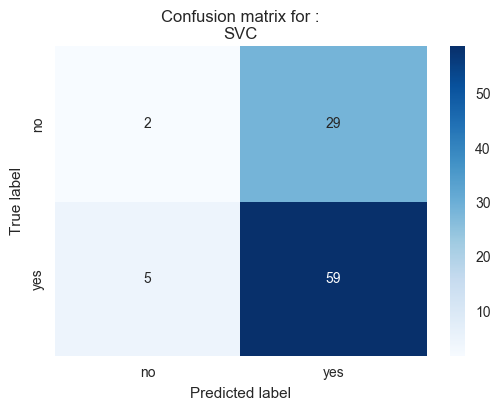

In [10]:
# SVC confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# compute confusion matrix for the selected model
model=clf_B
cm=confusion_matrix(y_test.values,model.predict(X_test))

#view with a heatmap

sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=['no','yes'],yticklabels=['no','yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for :\n{}'.format(model.__class__.__name__))




### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Per the mentor's feedback, provide a simplified answer for a non-techincal audience: **

The SVM takes data about past students(age,gender,family,etc)and uses them to create a function that draws a boundary between the students who graduated and those who did not. The boundary should be drawn so as to maximize the distance between 2 classes.The distance is measured from the points that are closest to the boundary,which are call the support vectors.

<img src='svc1.png'>


Often,though, it is not easy to draw a decision boundary in low dimensions, so the SVM separates the passing and falling students by transforming the input space to the feature space, so that make possible to draw a hyperplace to divide the two classes. The algorithm selects the boundary with largest gaps between the classes.
<img src='svc2.png'>

With the model generated from training data(students 'passed' and 'not passed'),we can predict new students by feeding those points into the model, the model transforms the new input data into feature space and predicts the student pass or fail.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [11]:
# SVM Model Tuning
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn import grid_search
from sklearn.metrics import f1_score, make_scorer
from sklearn import preprocessing

# TODO: Create the parameters list you wish to tune
C=[0.1,0.5,1.0,1.5,2.0,3.0,5.0,10.0,50.0,100.0]
gamma=[0.01,0.05,0.06,0.1,0.3,0.5,0.6,1]
kernel=['linear','rbf','poly']
parameters = { 'kernel':kernel,'C':C,'gamma':gamma}

# TODO: Initialize the classifier
clf = svm.SVC(random_state=0)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method

grid_obj =grid_search.GridSearchCV(clf,parameters,scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Parameters lead to the best results
print "The parameters that led to the best results:{}".format(grid_obj.best_params_)

# Best Score during Cross Validation
print "\nBest Score During Cross Validation:{}".format(grid_obj.best_score_)
print ""

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

The parameters that led to the best results:{'kernel': 'poly', 'C': 0.1, 'gamma': 0.01}

Best Score During Cross Validation:0.823572341551

Made predictions in 0.0029 seconds.
Tuned model has a training F1 score of 0.8653.
Made predictions in 0.0011 seconds.
Tuned model has a testing F1 score of 0.7895.


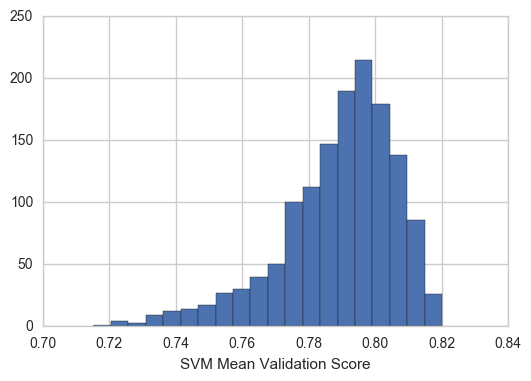

In [34]:
# Look at SVC grid scores

import pandas as pd
import matplotlib.pyplot as plt
grid_scores=pd.DataFrame(grid_obj.grid_scores_)['mean_validation_score']
plt.hist(grid_scores,bins=20)
plt.xlabel('SVM Mean Validation Score')
plt.show()

In [28]:
# Parameters Tuning for Enemble Random Forest

# TODO: Create the parameters list you wish to tune
n_estimators=np.arange(5,40,5)
criterion= ["gini", "entropy"]
max_depth=np.arange(5,15,1)
min_samples_split=np.arange(5,10,1) 
bootstrap=[True, False]

param_grid={"n_estimators":n_estimators, 
           "criterion": criterion,
           "max_depth":max_depth,
           "min_samples_split":min_samples_split ,
           "bootstrap":bootstrap}

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=0)
# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method

grid_obj =grid_search.GridSearchCV(clf, param_grid, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Parameters lead to the best results
print "The parameters that led to the best results:{}".format(grid_obj.best_params_)

# Best Score during Cross Validation
print "\nBest Score During Cross Validation:{}".format(grid_obj.best_score_)
print ""

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

The parameters that led to the best results:{'min_samples_split': 9, 'n_estimators': 30, 'bootstrap': False, 'criterion': 'gini', 'max_depth': 11}

Best Score During Cross Validation:0.82020916188

Made predictions in 0.0032 seconds.
Tuned model has a training F1 score of 0.9757.
Made predictions in 0.0020 seconds.
Tuned model has a testing F1 score of 0.7945.


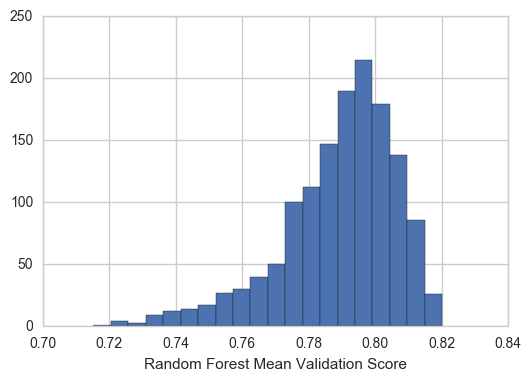

In [31]:
# Random Forest grid scores
grid_scores=pd.DataFrame(grid_obj.grid_scores_)['mean_validation_score']
plt.hist(grid_scores,bins=20)
plt.xlabel('Random Forest Mean Validation Score')
plt.show()

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

After tuned 2 models: Support Vector Machine and Random Forest, the testing F1 score  on both tuned models are very close. However the training F1 score, SVC model slightly converges a little better than RF model. The F1 score on Random Forest is 0.9757, which makes me doubt of over-fitting.

So compared 2 tuned model, I still choose SVC model for our problem. The final F1 score on training is: 0.8653 and on testing is: 0.7895. Compared to the untuned model(F1 score: 0.8753(training),0.7763(testing)), both scores improved about 0.013.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.